In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "./drive/MyDrive/archive.zip" -d "./sample_data/data"


Archive:  ./drive/MyDrive/archive.zip
  inflating: ./sample_data/data/COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: ./sample_data/data/COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: ./sample_data/data/COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: ./sample_data/data/COVID_IEEE/cov

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import random
import os
import cv2
import tensorflow as tf

In [ ]:
data_dir = pathlib.Path("./sample_data/data/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [ ]:
data=[]
labels=[]

In [ ]:
def preprocessing(string, flag):
  folder=os.listdir(data_dir/string)
  for a in folder:
      image = cv2.imread(str(data_dir.absolute() / string / a))
      image = cv2.resize(image, (224, 224))
      data.append(image)
      labels.append(flag)

In [ ]:
preprocessing("covid", 0)
preprocessing("normal", 1)
preprocessing("virus", 2)

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.4, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
# Создание модели
model = Sequential()

#Блок 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(Conv2D(filters=32, padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(Conv2D(filters=32, padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.35))

#Блок 2
model.add(Conv2D(filters=64, padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(Conv2D(filters=64, padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(Conv2D(filters=64, padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.35))

#Блок 3
model.add(Conv2D(filters=128,padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(Conv2D(filters=128,padding="same", activation = 'relu', kernel_size= (3,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(units=250, activation="relu"))
model.add(Dropout(0.35))

model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.35))

model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      18496     
                                                      

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.4, epochs=50, batch_size=32)

Epoch 1/50
21/21 [==============================] - 11s 316ms/step - loss: 1.1132 - accuracy: 0.4015 - val_loss: 0.8904 - val_accuracy: 0.6689
Epoch 2/50
21/21 [==============================] - 6s 283ms/step - loss: 0.9094 - accuracy: 0.5695 - val_loss: 0.6789 - val_accuracy: 0.6142
Epoch 3/50
21/21 [==============================] - 6s 277ms/step - loss: 0.6823 - accuracy: 0.6672 - val_loss: 0.6437 - val_accuracy: 0.7032
Epoch 4/50
21/21 [==============================] - 6s 276ms/step - loss: 0.6296 - accuracy: 0.7130 - val_loss: 0.7087 - val_accuracy: 0.7237
Epoch 5/50
21/21 [==============================] - 6s 274ms/step - loss: 0.5873 - accuracy: 0.7527 - val_loss: 0.4455 - val_accuracy: 0.8584
Epoch 6/50
21/21 [==============================] - 6s 272ms/step - loss: 0.4432 - accuracy: 0.8565 - val_loss: 0.3225 - val_accuracy: 0.8995
Epoch 7/50
21/21 [==============================] - 6s 276ms/step - loss: 0.3329 - accuracy: 0.8931 - val_loss: 0.3163 - val_accuracy: 0.8904
Epoch

In [ ]:
model.save('./drive/MyDrive/Model for detecting viral infections by classifying lung X-rays.h5')

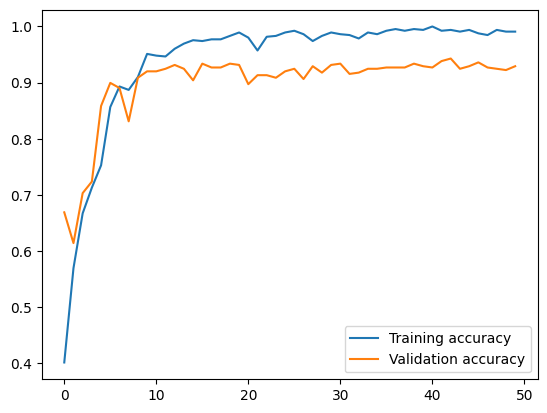

In [ ]:
plt.plot(history.history['accuracy'],
         label='Training accuracy')
plt.plot(history.history['val_accuracy'],
         label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)

23/23 [==============================] - 1s 49ms/step - loss: 0.3386 - accuracy: 0.9411
